# [Finding the best chocolate bars](https://app.datacamp.com/workspace/w/8670b5a6-1cf9-45f8-8f5b-fa1cdaeccde5)

## 📖 Background
A specialty foods import company wants to expand into gourmet chocolate bars. Let's research this market to inform the initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, we will need to explore if the chocolate bars with the highest ratings share any characteristics that could help narrow down the search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### The data file contains the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## 💪 Challenge
This notebooks aims to report on the following questions:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

## Summary

- The average rating by country of origin ranges from 2.71 to 3.63. The country with the highest average rating is Tobago, whereas the lowest is Puerto Rico.
- The highest numbers of bars were reviewed for the country Venezulea with 253 bars reviewed.
- Cocoa bean's country of origin is not an indicator of quality.
- Cocoa percent and rating is not correlated. The average cocao content for bars with higher ratings (above 3.5) is 71.108.
- The average rating of bars without Lecithin is higher than bars with the ingredient.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
sns.set(rc = {'figure.figsize':(20,5)})
plt.style.use('ggplot')

In [2]:
# Function to display value on seaborn barplot
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.05
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Load Data

In [3]:
# Reading in the data
df = pd.read_csv('data/chocolate_bars.csv')
# Set id as index
df.set_index('id', inplace=True)
# Take a look at the first datapoints
df.head()

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


## Data Size and Structure

- Dataset comprises of 2530 observations and 10 columns, of which some are categorical and numerical.
- `num_ingredients` and `ingredients` contains null values.
- There are no duplicated values.

In [4]:
print(f'Shape: {df.shape}')

Shape: (2530, 10)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530 entries, 2454 to 2170
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      2530 non-null   object 
 1   company_location  2530 non-null   object 
 2   year_reviewed     2530 non-null   int64  
 3   bean_origin       2530 non-null   object 
 4   bar_name          2530 non-null   object 
 5   cocoa_percent     2530 non-null   float64
 6   num_ingredients   2443 non-null   float64
 7   ingredients       2443 non-null   object 
 8   review            2530 non-null   object 
 9   rating            2530 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 217.4+ KB


In [6]:
df.describe()

,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2443.000000,2530.000000
mean,2014.374308,71.639723,3.041343,3.196344
std,3.968267,5.616724,0.913728,0.445321
min,2006.000000,42.000000,1.000000,1.000000
25%,2012.000000,70.000000,2.000000,3.000000
50%,2015.000000,70.000000,3.000000,3.250000
75%,2018.000000,74.000000,4.000000,3.500000
max,2021.000000,100.000000,6.000000,4.000000


In [7]:
df.isnull().sum()

manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Missing Data

For the 87 records that have missing information. If `ingredients` is NaN, then `num_ingredients` is also NaN. Therefore `num_ingredients` is MNAR (missing not at random).

In [9]:
df[df.num_ingredients.isnull() & df.ingredients.isnull()]

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
1964,Amazing Cacao,Russia,2017,Peru,Maranon,70.0,NaN,NaN,"raisins, pungent",3.00
1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70.0,NaN,NaN,"few grits, blackcherry, licorice",3.50
486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100.0,NaN,NaN,"very nutty, very bitter",1.75
81,Bonnat,France,2006,Blend,One Hundred,100.0,NaN,NaN,"acidic, bitter, dry",1.50
341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100.0,NaN,NaN,"cardboard, very bitter, floral",1.50
...,...,...,...,...,...,...,...,...,...,...
153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",100.0,NaN,NaN,"bland, mild fruit, strong bitter",2.00
153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",90.0,NaN,NaN,"some fruit, strong bitter",2.00
153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",75.0,NaN,NaN,"cocoa,earthy,very astringent",3.00


## 1. What is the average rating by country of origin?

The average rating by country of origin ranges from 2.71 to 3.63. <br>
The country with the highest average rating is Tobago, whereas the lowest is Puerto Rico.

In [11]:
avg_rating_by_origin = (
    df
    .groupby("bean_origin")
    .rating.mean()
    .reset_index()
    .sort_values(by="rating", ascending=False)
)
avg_rating_by_origin

,bean_origin,rating
54,Tobago,3.625000
7,China,3.500000
42,Sao Tome & Principe,3.500000
44,Solomon Islands,3.450000
9,Congo,3.318182
...,...,...
43,Sierra Leone,2.750000
47,St.Vincent-Grenadines,2.750000
38,Principe,2.750000
30,Martinique,2.750000


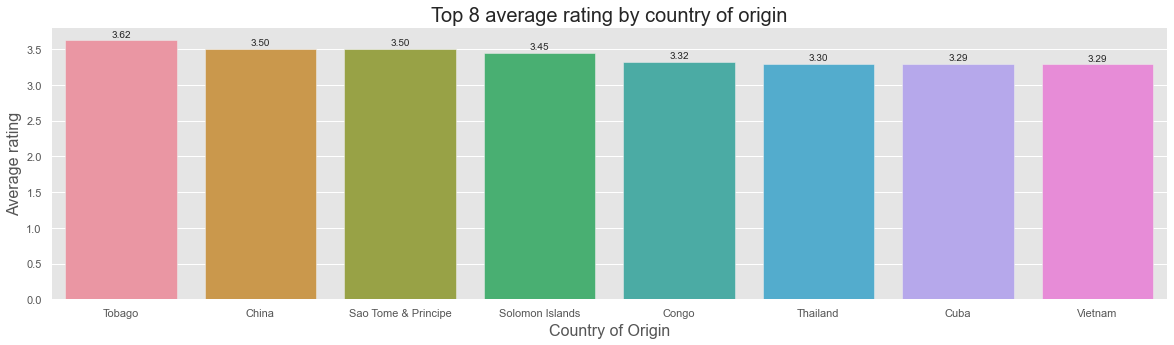

In [12]:
ax = sns.barplot(x="bean_origin", y="rating", data=avg_rating_by_origin[0:8])
show_values_on_bars(ax)
plt.title("Top 8 average rating by country of origin", fontsize=20)
plt.xlabel("Country of Origin", fontsize=16)
plt.ylabel("Average rating", fontsize=16)
plt.show()

## 2. How many bars were reviewed for each of those countries?

The highest numbers of bars were reviewed for the country Venezulea with 253 bars reviewed.

In [13]:
bar_count_by_origin = (df
                       .groupby("bean_origin")
                       .bar_name.count()
                       .reset_index()
                       .sort_values(by='bar_name', ascending=False)
                       .rename({"bar_name": "no. of bars reviewed"}, axis=1)
                      )
bar_count_by_origin

,bean_origin,no. of bars reviewed
60,Venezuela,253
36,Peru,244
13,Dominican Republic,226
14,Ecuador,219
28,Madagascar,177
...,...,...
50,Suriname,1
49,Sumatra,1
48,Sulawesi,1
47,St.Vincent-Grenadines,1


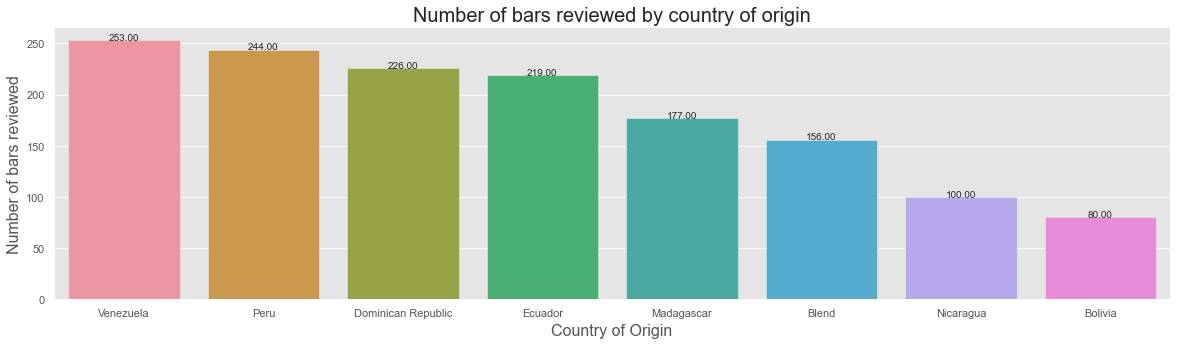

In [14]:
ax = sns.barplot(x="bean_origin",y="no. of bars reviewed", data=bar_count_by_origin[0:8])
show_values_on_bars(ax)
plt.title("Number of bars reviewed by country of origin", fontsize=20)
plt.xlabel("Country of Origin", fontsize=16)
plt.ylabel("Number of bars reviewed", fontsize=16)
plt.show()

## 3. Is the cacao bean's origin an indicator of quality?

Cocoa bean's country of origin is not an indicator of quality.

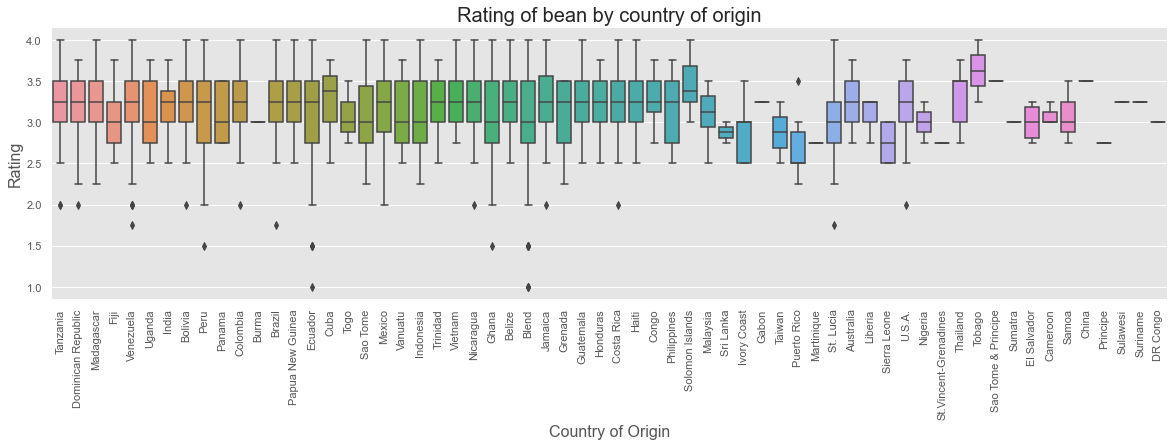

In [15]:
sns.boxplot(y="rating", x="bean_origin", data=df)
plt.xticks(rotation=90)
plt.title("Rating of bean by country of origin", fontsize=20)
plt.xlabel("Country of Origin", fontsize=16)
plt.ylabel("Rating", fontsize=16)
plt.show()

## 4. How does cocoa content relate to rating? 

`cocoa_percent` and `rating` is not correlated.

Pearsons correlation: -0.147


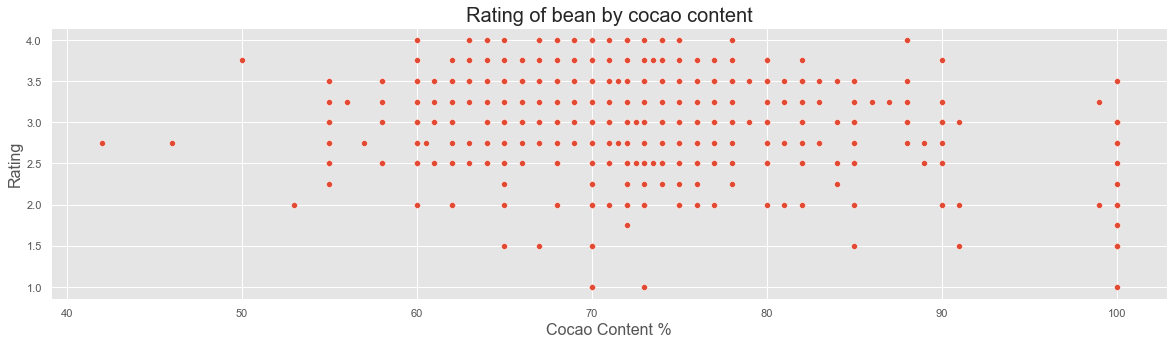

In [16]:
# calculate Pearson's correlation
corr, _ = pearsonr(df.rating, df.cocoa_percent)
print('Pearsons correlation: %.3f' % corr)

sns.scatterplot(y="rating", x="cocoa_percent", data=df)
plt.title("Rating of bean by cocao content", fontsize=20)
plt.xlabel("Cocao Content %", fontsize=16)
plt.ylabel("Rating", fontsize=16)
plt.show()

## 4.5 What is the average cocoa content for bars with higher ratings (above 3.5)?

In [17]:
np.round(df[df['rating']>=3.5].cocoa_percent.mean(), 3)

71.108

## 5. Compare the average rating of bars with and without lecithin (L in the ingredients).

Some consumers want to avoid bars with lecithin.

The average rating of bars without Lecithin is higher than bars with the ingredient.

In [18]:
df = df.dropna()
contains_L = df["ingredients"].str.contains("L")
avg_rating_with_L = round(df[contains_L].rating.mean(), 3)
avg_rating_without_L = round(df[~contains_L].rating.mean(), 3)
print(f"Average rating with lecithin: {avg_rating_with_L}")
print(f"Average rating without lecithin: {avg_rating_without_L}")

Average rating with lecithin: 3.151
Average rating without lecithin: 3.225
